### How To Implement Simple Linear Regression From Scratch With Python
https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/

In [1]:
import pandas as pd
from random import randrange
from random import seed
from math import sqrt
from matplotlib import pyplot as plt

dataset_df = pd.read_excel('slr06.xls')
dataset = dataset_df.values.tolist()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
[[108.0, 392.5], [19.0, 46.2], [13.0, 15.7], [124.0, 422.2], [40.0, 119.4], [57.0, 170.9], [23.0, 56.9], [14.0, 77.5], [45.0, 214.0], [10.0, 65.3], [5.0, 20.9], [48.0, 248.1], [11.0, 23.5], [23.0, 39.6], [7.0, 48.8], [2.0, 6.6], [24.0, 134.9], [6.0, 50.9], [3.0, 4.4], [23.0, 113.0], [6.0, 14.8], [9.0, 48.7], [9.0, 52.1], [3.0, 13.2], [29.0, 103.9], [7.0, 77.5], [4.0, 11.8], [20.0, 98.1], [7.0, 27.9], [4.0, 38.1], [0.0, 0.0], [25.0, 69.2], [6.0, 14.6], [5.0, 40.3], [22.0, 161.5], [11.0, 57.2], [61.0, 217.6], [12.0, 58.1], [4.0, 12.6], [16.0, 59.6], [13.0, 89.9], [60.0, 202.4], [41.0, 181.3], [37.0, 152.8], [55.0, 162.8], [41.0, 73.4], [11.0, 21.3], [27.0, 92.6], [8.0, 76.1], [3.0, 39.9], [17.0, 142.1], [13.0, 93.0], [13.0, 31.9], [15.0, 32.1], [8.0, 55.6], [29.0, 133.3], [30.0, 194.5], [24.0, 137.9], [9.0, 87.4], [31.0, 209.8], [14.0, 95.5], [53.0, 244.6], [26.0, 187.5]]


$b_{0} = \bar{y} - b_{1}\bar{x}$, $b_{1}=\frac{\sum\left(x-\bar{x}\right)\left(y-\bar{y}\right)}{\sum\left(x-\bar{x}\right)^{2}}=\frac{Cov(x,y)}{Var(x,y)}$

In [2]:
def mean(values):
    return sum(values)/float(len(values))

def variance(values, mean):
    return sum([(each_value-mean)**2 for each_value in values])

def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar
#mean_x, mean_y = mean(x), mean(y)
#var_x, var_y = variance(x, mean_x), variance(y, mean_y)
#covar = covariance(x, mean_x, y, mean_y)
def coefficients(train):
    x = [row[0] for row in train]
    y = [row[1] for row in train]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    print('x stats: mean=%.3f' % x_mean)
    print('y stats: mean=%.3f' % y_mean)
    return [b0, b1]

#b0, b1 = coefficients(x,y)






Split the dataset in random order for the training dataset. The ratio of training set to the original dataset is set as 0.6 

In [3]:
def train_test_split(dataset, split_ratio):
    training_set = list()
    dataset_copy = list(dataset)
    train_size = split_ratio * len(dataset)
    while len(training_set) < train_size:
        index = randrange(len(dataset_copy))
        training_set.append(dataset_copy.pop(index))    
    plt.figure(1)
    x = [row[0] for row in training_set]
    y = [row[-1] for row in training_set]
    plt.scatter(x,y,c='b')
    plt.title('Training data set')
    #print(plt.figure(1))
    return training_set, dataset_copy
#dataset_copy is now the testing dataset.


In [4]:
def rmse_metric(actual, predicted):
    sum_error = 0.0
    prediction_error_list = list()
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        #prediction_error_list.append(prediction_error)
        #prediction_error_list.append([predicted[i],actual[i]])
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [5]:
def evaluate_algorithm(dataset, algorithm, split):
    train, test = train_test_split(dataset, split)
    test_set = list()
    for row in test:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
        #Remove the 'Y' value in testing set
    predicted = algorithm(train, test_set)
    actual = [row[-1] for row in test]
    x = [row[0] for row in test]
    rmse = rmse_metric(actual, predicted)
    plt.figure(2)
    plt.scatter(x,actual,c='orange')
    plt.plot(x,predicted,'r')
    plt.title('Testing dataset')
    return rmse

In [6]:
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
        
   # data = pd.DataFrame(list(zip(x, y, predictions)), columns=['x','actual y', 'predicted y'])
    #print(data)
    return predictions

x stats: mean=27.447
y stats: mean=119.287
Coefficients: B0=28.229, B1=3.318
RMSE: 33.630


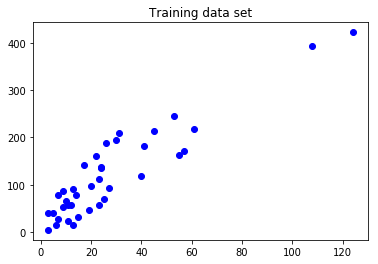

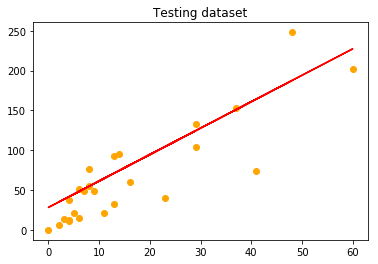

In [7]:
seed(1)
split = 0.6
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)

print('RMSE: %.3f' % (rmse))